In [14]:
import numpy as np
import cv2
import os
import pyvista as pv


In [ ]:

# Folder containing your JPEG slices
embryo_idx = 'D2018.04.25_S00244_I3027_P-9'
image_run = '698'
image_folder = os.path.join('embryo_images', embryo_idx, f'run_{image_run}')

image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(".jpg")])

# List to store 2D slices
slices = []

for fname in image_files:
    file_path = os.path.join(image_folder, fname)
    
    # Load image in grayscale mode
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"Failed to load image: {fname}")
        continue
    
    slices.append(img)

# Stack into a 3D numpy array: shape = (height, width, depth)
volume = np.stack(slices, axis=-1)

In [11]:
volume

array([[[106, 136, 147, ..., 138, 126, 154],
        [106, 134, 148, ..., 138, 126, 153],
        [106, 130, 149, ..., 139, 127, 152],
        ...,
        [  0,   2,   2, ...,   2,   2,   2],
        [  0,   2,   2, ...,   2,   2,   2],
        [  0,   2,   2, ...,   2,   2,   2]],

       [[106, 135, 148, ..., 138, 126, 153],
        [106, 132, 149, ..., 139, 127, 153],
        [106, 128, 150, ..., 139, 127, 152],
        ...,
        [  0,   2,   2, ...,   2,   2,   2],
        [  0,   2,   2, ...,   2,   2,   2],
        [  0,   2,   2, ...,   2,   2,   2]],

       [[105, 132, 150, ..., 139, 127, 152],
        [105, 130, 150, ..., 139, 127, 152],
        [105, 126, 151, ..., 140, 128, 151],
        ...,
        [  0,   2,   2, ...,   2,   2,   2],
        [  0,   2,   2, ...,   2,   2,   2],
        [  0,   2,   2, ...,   2,   2,   2]],

       ...,

       [[112, 101, 113, ..., 159, 160, 169],
        [112, 101, 113, ..., 159, 160, 169],
        [114, 102, 112, ..., 158, 161, 170

c:\Users\FilipeFurlanBellotti\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


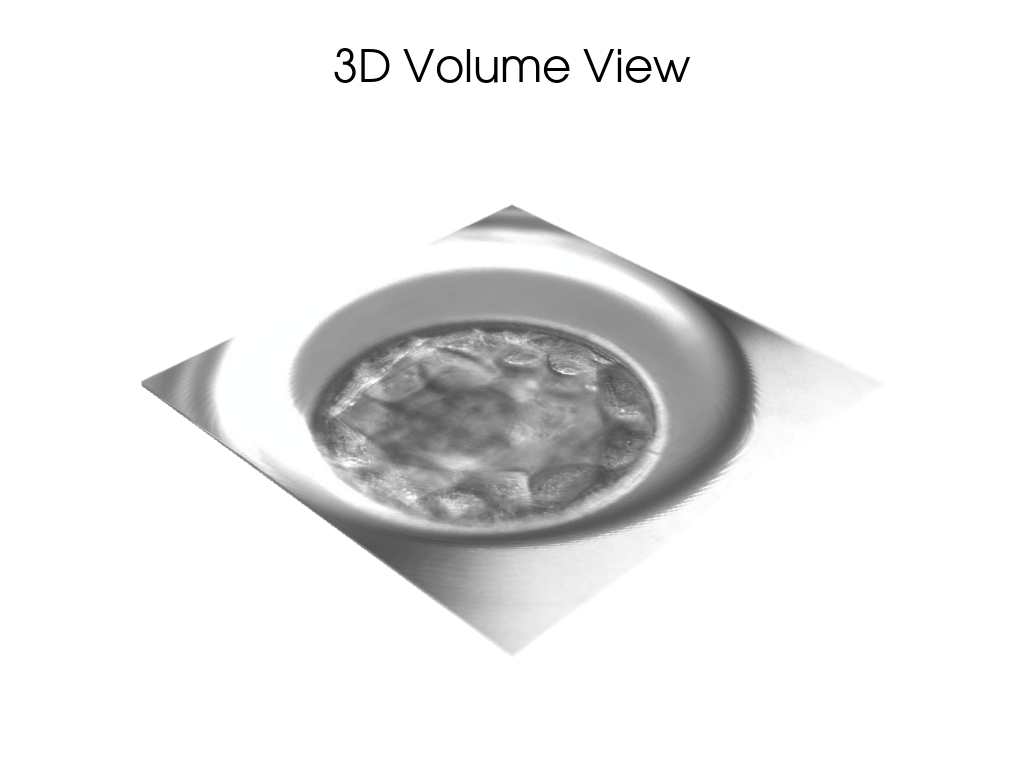

In [23]:
# Create a PyVista uniform grid with the correct dimensions and data
grid = pv.ImageData(dimensions=(volume.shape[0], volume.shape[1], volume.shape[2]))

# Set the spacing (default is 1 unit per pixel)
grid.spacing = (1.0, 1.0, 1.0)

# Add the volume data as point data (not cell data)
grid.point_data["values"] = volume.ravel(order="F")

# Create a plotter instance
plotter = pv.Plotter()

# Add the volume to the plotter with the correct scalar name
plotter.add_volume(
    grid,
    scalars="values",
    cmap="gray",
    opacity="linear",
    show_scalar_bar=False
)

# Set the title
plotter.add_title("3D Volume View")

# Show the plot
plotter.show()

c:\Users\FilipeFurlanBellotti\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


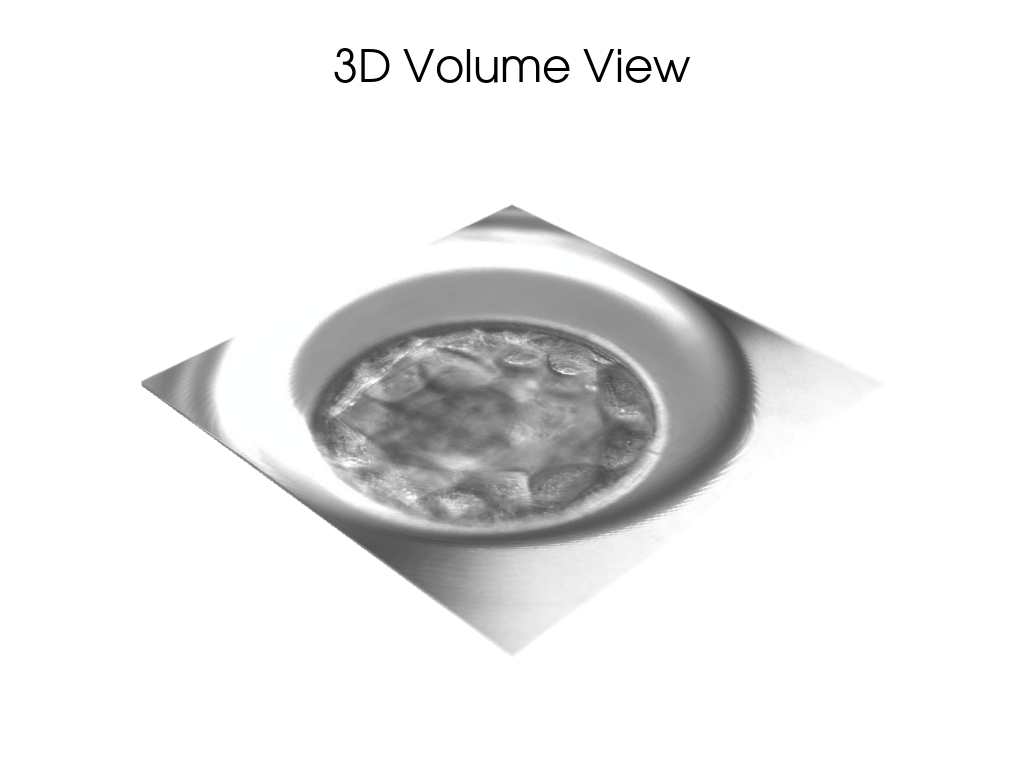

In [ ]:
# Create a PyVista uniform grid
grid = pv.ImageData(dimensions=(volume.shape[0], volume.shape[1], volume.shape[2]))
grid.spacing = (1.0, 1.0, 0.5)  # Adjust Z spacing to enhance depth perception
grid.point_data["values"] = volume.ravel(order="F")

# Create a plotter instance with a dark background
plotter = pv.Plotter(lighting="none")
plotter.background_color = 'black'

# Create a custom opacity transfer function that highlights the sphere structure
opacity = np.array([0, 0, 0.1, 0.3, 0.6, 0.9])

# Add the volume with optimized parameters for sphere visualization
plotter.add_volume(
    grid,
    scalars="values",
    cmap="plasma",  # Changed colormap to better highlight structure
    opacity=opacity,
    clim=[80, 180],  # Adjusted contrast range
    show_scalar_bar=False,
    ambient=0.4,
    diffuse=0.8,
    specular=0.3,
)

# Set camera position for better spherical view
plotter.camera.elevation = 30
plotter.camera.azimuth = 60
plotter.camera.zoom(1.8)

# Show the plot
plotter.show()
